<a href="https://colab.research.google.com/github/View490/Code/blob/main/WorkshopData01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dtreeviz

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import time

from IPython.display import clear_output 

data_codes = np.array([['ไม่ใส่', 'ใส่'],
                       ['กีฬา', 'เข้ายิม'],
                       ['ไม่ชอบกินผัก', 'ชอบกินผัก'],
                       ['กินก๋วยเตี๋ยว', 'กินข้าว'],
                       ['ยกซด', 'ใช้หลอด'],
                       ['นอนตะแคง', 'นอนคว่ำ', 'นอนหงาย'],
                       ['ทำงานกลางคืน', 'ทำงานกลางวัน'],
                       ['Introvert', 'Extrovert'],
                       ['ไม่สนใจทำ IF', 'สนใจทำ IF'],
                       ['รับสายทันที ปล่อยไก่ไหม้', 'เดี๋ยวไก่ไหม้ ไว้โทรกลับ'],
                       ['เงินสด', 'Internet banking'],
                       ['สุนัข', 'แมว'],
                       ['Android phone', 'iphone'],
                       ['ถนัดวาดรูป', 'ถนัดคิดคำนวณ'],
                       ['สายลุย', 'ติดหรู'],
                       ['ไม่ชอบดื่มกาแฟ', 'ชอบดื่มกาแฟ'],
                       ['รองเท้าแตะ', 'รองเท้าผ้าใบ'],
                       ['ไม่ลวก', 'ลวก'],
                       ['Mac', 'Window'],
                       ['KFC', 'Bonchon'],
                       ['อยู่บ้าน', 'ออกไปเที่ยว'],
                       ['นั่งมอไซค์', 'นั่งรถยนต์'],
                       ['โสด', 'มีแฟน'],
                       ['ไม่สนใจ', 'สนใจ'],
                       ['ความรัก', 'ความรวย', 'ชื่อเสียง'],
                       ['ไม่นับ', 'นับ'],
                       ['น้อยกว่า 5 ครั้ง/เดือน', '6-10 ครั้ง/เดือน', '11-15 ครั้ง/เดือน', '16-20 ครั้ง/เดือน', 'มากกว่า 25 ครั้ง/เดือน'],
                       ['โกหกว่าใกล้ถึง', 'บอกความจริงว่าเพิ่งตื่น'],
                       ['ภูเขา', 'ทะเล'],
                       ['Private mode', 'Normal mode']
])

feature_codes = ['glasses', 'exercise', 'vegetable', 'food', 'drink', 'sleep', 'work', 'personality', 'if', 'call',
                 'pay', 'pet', 'phone', 'skill', 'travel', 'coffee', 'shoes', 'mee', 'computer', 'chicken',
                 'home', 'ride', 'single', 'invest', 'blessing', 'calorie', 'fastfood', 'lie', 'where', 'browser']

def ChangeDatas(dataf):
  dataf.columns = ['Time', 'glasses', 'exercise', 'vegetable', 'food', 'drink', 'sleep', 'work', 'personality', 'if', 'call',
                   'pay', 'pet', 'phone', 'skill', 'travel', 'coffee', 'shoes', 'mee', 'computer', 'chicken',
                   'home', 'ride', 'single', 'invest', 'blessing', 'calorie', 'fastfood', 'lie', 'where', 'browser']

  for i in range(len(dataf)):
    for j in range(len(data_codes)):
      for k in range(len(data_codes[j])):
         if dataf.iloc[i,j+1] == data_codes[j][k]:
           dataf.iloc[i,j+1] = int(k)
           break

  return dataf

def CreateXY(df, output, features):
  features.append(output)

  mini = []
  for feature in features:
    for i, feature_code in enumerate(feature_codes):
      if feature.lower()==feature_code:
        mini.append(i+1)
        break

  if len(mini)!=len(features):
    raise ValueError("ERROR: you have entered an incorrect features/output. You have to enter values like this only:\n{}\n{}\n{}".format(
        feature_codes[0:10], feature_codes[10:20], feature_codes[20:]))
  
  return np.array(df.iloc[:, mini[0:len(mini)-1]]).astype('int'), np.array(df.iloc[:, mini[len(mini)-1]]).astype('int')

clear_output()

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/18nPF0zMyJPlhk27l_6saDnMCWPdaBEanHjXqD4pdAsA/export?format=csv&edit?usp=sharing'
df = pd.read_csv(url)
df = ChangeDatas(df)
print('number of dataset:', len(df))

#customize part
out = 'single'
feature = ['sleep', 'glasses', 'food', 'work', 'lie', 'blessing', 'call', 'pay', 'home', 'mee']

X, Y = CreateXY(df, out, feature)
# X = np.array(df.drop(['Time','browser'], axis=1)).astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=123)
print('train/test data done...')

number of dataset: 300
train/test data done...


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

tic = time.time()

rf = RandomForestClassifier(n_estimators = 1000, random_state = 123)
rf.fit(X_train, Y_train)

# rf = MLPClassifier(hidden_layer_sizes=[16,64,16], max_iter=500).fit(X_train, Y_train)


print('time:', time.time()-tic)
print('accuracy of training RF:', rf.score(X_train, Y_train)*100, '%')
print('accuracy of testing RF:', rf.score(X_test, Y_test)*100, '%')
print("confusion_matrix\n", confusion_matrix(Y_test, rf.predict(X_test)))

time: 1.5794661045074463
accuracy of training RF: 94.16666666666667 %
accuracy of testing RF: 70.0 %
confusion_matrix
 [[39  5]
 [13  3]]


Describe classes
class 0: Introvert
class 1: Extrovert


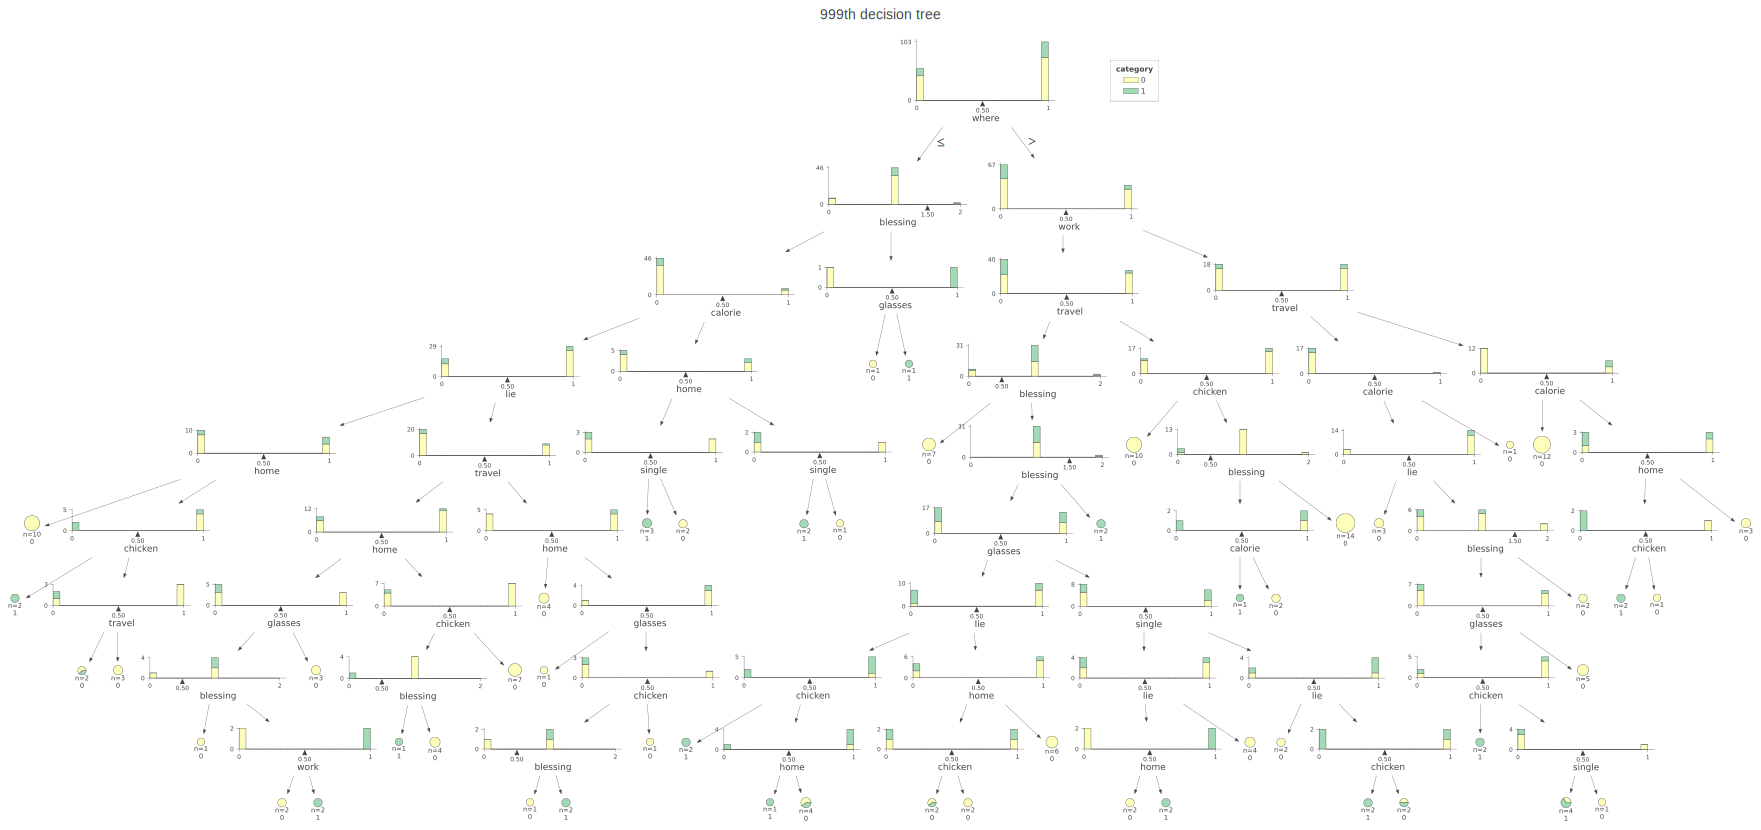

In [ ]:
# !pip install dtreeviz
from dtreeviz.trees import dtreeviz

text_show = "Describe classes"
for i in range(len(feature_codes)):
  if out.lower()==feature_codes[i]:
    class_name = range(len(data_codes[i]))
    for j in class_name:
      text_show = "{}\nclass {}: {}".format(text_show, j, data_codes[i][j])

    break

viz = dtreeviz(rf.estimators_[998], X_train, Y_train,
               target_name="category",
               feature_names=feature,
               class_names=class_name,
               title="999th decision tree")

# viz.save("decision_tree.svg")

clear_output()
print(text_show)

from IPython.display import SVG, display
display(viz)